In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
# nacitanie DS, zobrazenie poctu riadkov, stlpcov

banknote = pd.read_csv('data_banknote_authentication.xls')
banknote.shape

(1371, 5)

In [3]:
banknote.head()

,Var,Skew,Curt,Entropy,Class
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


In [4]:
banknote.describe()

,Var,Skew,Curt,Entropy,Class
count,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000
mean,0.431410,1.917434,1.400694,-1.192200,0.444931
std,2.842494,5.868359,4.310105,2.101683,0.497139
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.774700,-1.711300,-1.553350,-2.417000,0.000000
50%,0.495710,2.313400,0.616630,-0.586650,0.000000
75%,2.814650,6.813100,3.181600,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


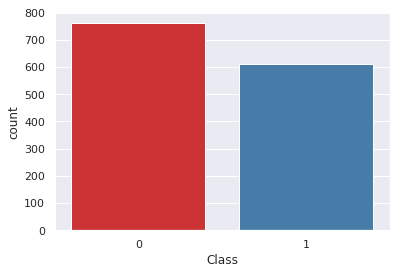

In [5]:
# zobrazenie porovnania pravych, falosnych bankoviek

sns.set(style="darkgrid")
sns.countplot(x='Class', data=banknote, palette="Set1")

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


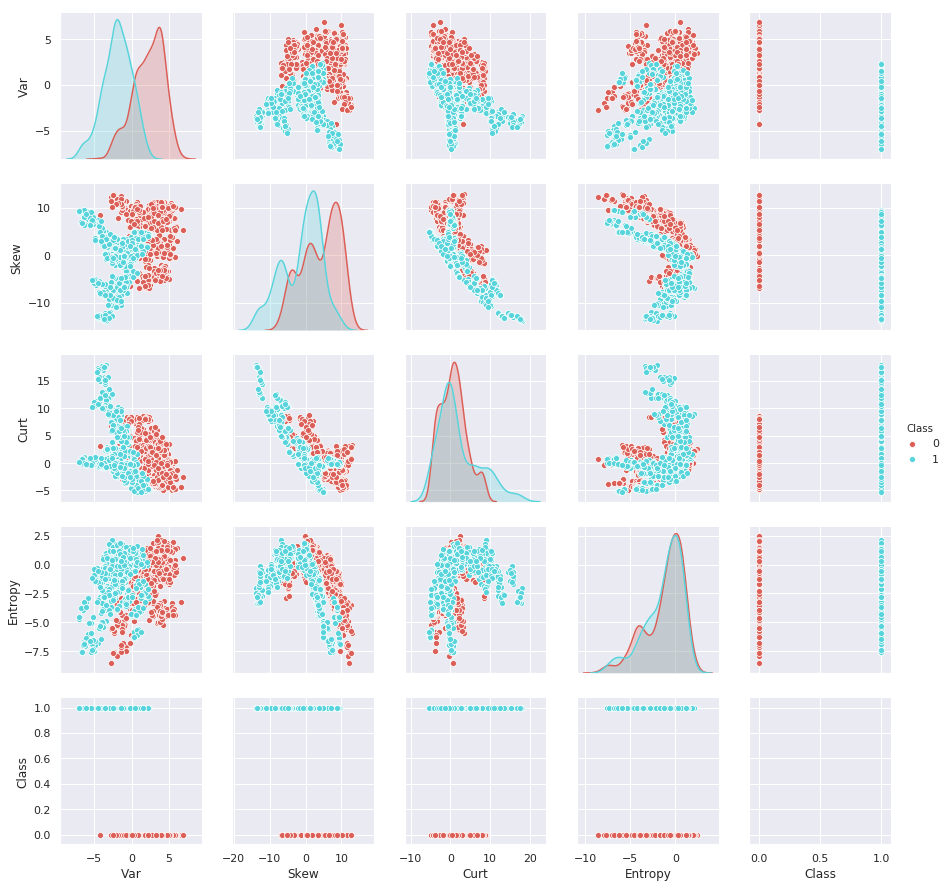

In [6]:
# vizualizacia vztahov medzi bankovkami

sns.pairplot(data=banknote, hue='Class', palette= "hls")

In [7]:
# standardizovanie udajov ns

banknote_without_class = banknote.drop('Class', axis=1)

# vytvorenie samostaneho dataframe na ukladanie dalsich funkcii.

scaler = StandardScaler()
scaler.fit(banknote_without_class)
scaled_features = pd.DataFrame(data=scaler.transform(banknote_without_class), columns=banknote_without_class.columns)

In [8]:
# zobrazime udaje bez stlpca class

banknote_without_class.head()

,Var,Skew,Curt,Entropy
0,4.54590,8.1674,-2.4586,-1.46210
1,3.86600,-2.6383,1.9242,0.10645
2,3.45660,9.5228,-4.0112,-3.59440
3,0.32924,-4.4552,4.5718,-0.98880
4,4.36840,9.6718,-3.9606,-3.16250


In [9]:
# rozdelenie tried authentic a forged do dvoch stlpcov

banknote = banknote.rename(columns={'Class': 'Authentic'})
banknote.loc[banknote['Authentic'] == 0, 'Forged'] = 1
banknote.loc[banknote['Authentic'] == 1, 'Forged'] = 0

In [10]:
# X=skalovanie funkcie, Y=authentic,forged atributy
X = scaled_features
y = banknote[['Authentic', 'Forged']]

# prevod X a y do Numpy poli pomocou values.
X = X.values
y = y.values

In [11]:
# zobrazenie tabulky po upravach

banknote.head()

,Var,Skew,Curt,Entropy,Authentic,Forged
0,4.54590,8.1674,-2.4586,-1.46210,0,1.0
1,3.86600,-2.6383,1.9242,0.10645,0,1.0
2,3.45660,9.5228,-4.0112,-3.59440,0,1.0
3,0.32924,-4.4552,4.5718,-0.98880,0,1.0
4,4.36840,9.6718,-3.9606,-3.16250,0,1.0


In [12]:
# pouzijeme sklearn kniznicu train_test_split pre nase nezavisle a zavisle premenne
# rozdelime data do trenovacieho(80%) a testovacieho setu(20%).

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# trenovanie SET SHAPES
print(X_train.shape)
print(y_train.shape)

# testovanie SET SHAPES
print(X_test.shape)
print(y_test.shape)

(1096, 4)
(1096, 2)
(275, 4)
(275, 2)


In [14]:
#Nastavavime rychlost ucenia,pocet treningovych epochov,velkost davky.

learning_rate = 0.01
training_epochs = 100
batch_size = 1000

In [15]:
# vstupny tvar, uzly v 1. a 2. skrytej vrstve, triedy(autentic,forged)
n_input = 4
n_hidden_1 = 4
n_hidden_2 = 4 
n_classes = 2
n_samples = X_train.shape[0] 

In [16]:
# definujeme vztupy pre vizualizaciu

x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_classes])

In [17]:
# definujeme vahy a odchylky pre kazdu vrstvu.

weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [18]:
# definujeme NS s funkciou aktivacie ReLU pre kazdu vrstvu.

def multilayer_perceptron(x, weights, biases):
    
    
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    out_layer = tf.matmul(layer_2, weights['out'] + biases['out'])
    
    return out_layer

In [19]:
# nastavime predikciu na tenzor predict, kt. obsahuje vystup z NS.

predict = multilayer_perceptron(x, weights, biases)

# funkcia softmax na vypocet chybovosti, optimalizátor adam na minimalizaciu strat.

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y, logits=predict))
optimizer =tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [20]:
# Trenovanie -v kazdom epochu sa vypocita strata a optimalizator sa postara o minimalizovanie chyby

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
costs = []
for epoch in range(training_epochs):
    avg_cost = 0.0
    total_batch = int(n_samples/batch_size)
    for batch in range(total_batch):
        batch_x = X_train[batch*batch_size : (1+batch)*batch_size]
        batch_y = y_train[batch*batch_size : (1+batch)*batch_size]
        _, c = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})
        avg_cost += c / total_batch
    
    print("Epoch: {} cost={:.4f}".format(epoch+1,avg_cost))
    costs.append(avg_cost)
    
print("The model ended {} the epochs of training.".format(training_epochs))

Epoch: 1 cost=3.8239
Epoch: 2 cost=3.5553
Epoch: 3 cost=3.2976
Epoch: 4 cost=3.0516
Epoch: 5 cost=2.8180
Epoch: 6 cost=2.5958
Epoch: 7 cost=2.3859
Epoch: 8 cost=2.1913
Epoch: 9 cost=2.0132
Epoch: 10 cost=1.8499
Epoch: 11 cost=1.7003
Epoch: 12 cost=1.5646
Epoch: 13 cost=1.4427
Epoch: 14 cost=1.3346
Epoch: 15 cost=1.2394
Epoch: 16 cost=1.1556
Epoch: 17 cost=1.0833
Epoch: 18 cost=1.0227
Epoch: 19 cost=0.9740
Epoch: 20 cost=0.9361
Epoch: 21 cost=0.9056
Epoch: 22 cost=0.8800
Epoch: 23 cost=0.8572
Epoch: 24 cost=0.8348
Epoch: 25 cost=0.8122
Epoch: 26 cost=0.7885
Epoch: 27 cost=0.7632
Epoch: 28 cost=0.7373
Epoch: 29 cost=0.7118
Epoch: 30 cost=0.6870
Epoch: 31 cost=0.6639
Epoch: 32 cost=0.6427
Epoch: 33 cost=0.6236
Epoch: 34 cost=0.6066
Epoch: 35 cost=0.5923
Epoch: 36 cost=0.5802
Epoch: 37 cost=0.5700
Epoch: 38 cost=0.5613
Epoch: 39 cost=0.5537
Epoch: 40 cost=0.5471
Epoch: 41 cost=0.5412
Epoch: 42 cost=0.5358
Epoch: 43 cost=0.5307
Epoch: 44 cost=0.5259
Epoch: 45 cost=0.5211
Epoch: 46 cost=0.51

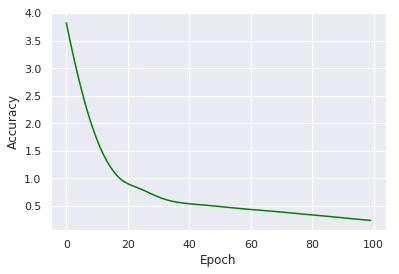

In [21]:
# graf presnosti v zavislosti od epochov

plt.plot(costs, color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [22]:
# overenie testovania NS-spocitame pocet spravnych predikcii. 
# definujeme presnosť ako priemerne % spravnych predikcii.

correct_predictions = tf.cast(tf.equal(tf.argmax(predict, 1), tf.argmax(y, 1)), tf.float32)

# vypocet presnosti natrenovaneho modelu

accuracy = tf.reduce_mean(correct_predictions)
print("accuracy ", (sess.run(accuracy, feed_dict={x: X_train, y: y_train}))*100,'%')

accuracy  90.0547444820404 %
